### Importing essential libararies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Sales_Data\Sales_April_2019.csv")


In [3]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Merging 12 months data 

In [4]:
months=['January','February','March','April','May','June','July','August','September','October',
        'November','December']
dfs=[]
for i in months:
    filename="\Sales_" + i + "_2019.csv"
    data=pd.read_csv("Sales_Data"+filename)
    data["month"]=i
    data.dropna()
    dfs.append(data)

In [5]:
data = pd.concat(dfs, ignore_index=True)
data.dropna()
data.shape

(186850, 7)

In [6]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January


### Converting month column to integer

In [7]:
##Extract month number from Order date
data['month'] = data['Order Date'].str[0:2]
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [8]:
## Identifying the rows with NaNs
df1 = data[data['month'].isnull()]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data['month'] = pd.to_numeric(data['month'], errors='coerce')
data.iloc[186461:186465]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
186461,319296,Lightning Charging Cable,1,14.95,12/05/19 12:49,"144 Main St, Boston, MA 02215",12.0
186462,319297,34in Ultrawide Monitor,1,379.99,12/27/19 16:06,"366 Center St, Dallas, TX 75001",12.0
186463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186464,319298,Lightning Charging Cable,1,14.95,12/16/19 18:53,"865 Pine St, Atlanta, GA 30301",12.0


In [10]:
data = data.dropna(subset=['month'])
data.shape

(185950, 7)

In [11]:
data['month'] = data['month'].astype(int)
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

### Inserting new row for total amount per Order

In [12]:
data['amt']= data['Price Each'].astype(float)

In [13]:
data['amt']=data['amt'] * (data['Quantity Ordered'].astype(float))

In [14]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
month                 int32
amt                 float64
dtype: object

### Sort sales by month

In [15]:
sales_by_month = {}
for i in range(1,13):
    df1=data[data['month']==i]
    sales_by_month.update({i:df1['amt'].sum()})  
df2=pd.DataFrame(sales_by_month, index=['total'])
sales_month=df2.transpose()
# sales_month

In [16]:
sorted_sales_month=pd.DataFrame(sales_month['total'].sort_values(ascending=False))
sorted_sales_month = sorted_sales_month.reset_index()
sorted_sales_month.set_axis(['Month', 'Total'], axis='columns', inplace=True)
sorted_sales_month['Month Name']='jan'
for i in sorted_sales_month['Month']:
    sorted_sales_month.loc[sorted_sales_month['Month']==i, 'Month Name'] = months[i-1]
sorted_sales_month

,Month,Total,Month Name
0,12,4613443.34,December
1,10,3736726.88,October
2,4,3390670.24,April
3,11,3199603.20,November
4,5,3152606.75,May
5,3,2807100.38,March
6,7,2647775.76,July
7,6,2577802.26,June
8,8,2244467.88,August
9,2,2202022.42,February


In [17]:
results=data.groupby('month').sum()

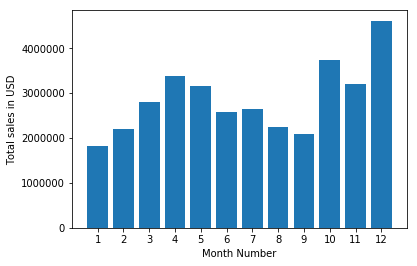

In [18]:
months=range(1,13)
plt.bar(months, results['amt'])
plt.xticks(months)
plt.ylabel('Total sales in USD')
plt.xlabel('Month Number')
plt.show()

### Adding city column

In [46]:
city=[]
for i in data['Purchase Address']:
    split=i.split(',')
    city.append(split[1]+ " " + split[2][1:3])
city[0:5]

[' Boston MA',
 ' Portland OR',
 ' San Francisco CA',
 ' Los Angeles CA',
 ' Austin TX']

In [20]:
data['city']=city

In [21]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,amt,city
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [22]:
by_city=data.groupby(city).sum()
by_city

,month,amt
Atlanta GA,104794,2.795499e+06
Austin TX,69829,1.819582e+06
Boston MA,141112,3.661642e+06
Dallas TX,104620,2.767975e+06
Los Angeles CA,208325,5.452571e+06
New York City NY,175741,4.664317e+06
Portland ME,17144,4.497583e+05
Portland OR,70621,1.870732e+06
San Francisco CA,315520,8.262204e+06
Seattle WA,104941,2.747755e+06


In [23]:
# by_city['amt'].sort_values(ascending=False)
import numpy as np
cities=data['city'].unique()
cities=np.sort(cities)

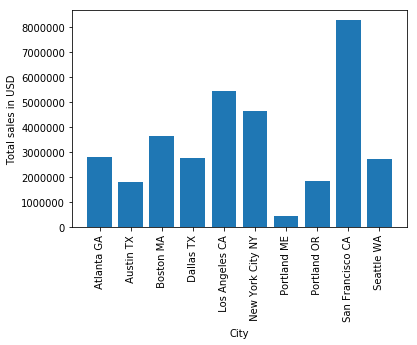

In [24]:

plt.bar(cities, by_city['amt'])
plt.xticks(cities,rotation='vertical')
plt.ylabel('Total sales in USD')
plt.xlabel('City')
plt.show()

### Time to Advertise to boost likelihood of orders

In [25]:
data['Order Date']= pd.to_datetime(data['Order Date'])

In [26]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,amt,city
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [27]:
data['hour'] = data['Order Date'].dt.hour
data['minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,amt,city,hour,minute
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


In [28]:
#### Grouped by total sales
by_time=data.groupby('hour').sum()
by_time.head()

,month,amt,minute
hour,,,
0,27554,713721.27,103596
1,16657,460866.88,61807
2,8507,234851.44,32508
3,5904,145757.89,23044
4,6148,162661.01,26876


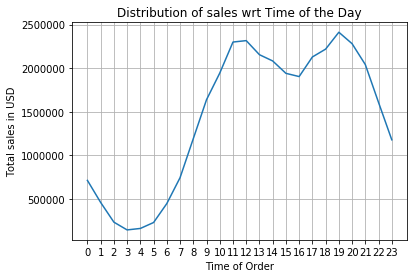

In [29]:
hours=range(0,24)
plt.plot(hours, by_time['amt'])
plt.xticks(hours)
plt.ylabel('Total sales in USD')
plt.xlabel('Time of Order')
plt.title('Distribution of sales wrt Time of the Day')
plt.grid()
plt.show()

In [30]:
#### Counting number of order(rows) by each hour
by_time=data.groupby('hour').count()
by_time.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,amt,city,minute
hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


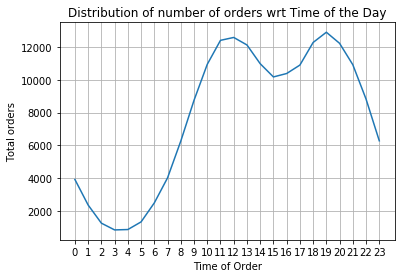

In [31]:
hours=range(0,24)
plt.plot(hours, by_time['amt'])
plt.xticks(hours)
plt.ylabel('Total orders')
plt.xlabel('Time of Order')
plt.title('Distribution of number of orders wrt Time of the Day')
plt.grid()
plt.show()

###From the graph we see around 1100(11AM)-1300(1PM)hrs and around 1900hrs(7PM)
###is the best time for advertising for all cities. Can be done specifically for different cities

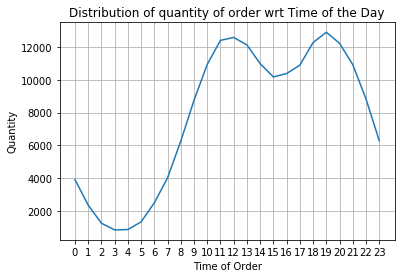

In [32]:
hours=range(0,24)
plt.plot(hours, by_time['Quantity Ordered'])
plt.xticks(hours)
plt.ylabel('Quantity')
plt.xlabel('Time of Order')
plt.title('Distribution of quantity of order wrt Time of the Day')
plt.grid()
plt.show()

### Finding products ordered together

In [33]:
### Filter by same Order ID. 
dup=data[data['Order ID'].duplicated(keep=False)]
dup.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,amt,city,hour,minute
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin TX,16,6
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,16,6
57,141290,Apple Airpods Headphones,1,150,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,8,25
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,8,25
133,141365,Vareebadd Phone,1,400,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,11,19
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City NY,11,19
153,141384,Google Phone,1,600,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston MA,0,14
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,11.95,Boston MA,0,14
220,141450,Google Phone,1,600,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco CA,11,16
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,99.99,San Francisco CA,11,16


In [34]:
dup['grouped']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup.head()

c:\users\harsh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,amt,city,hour,minute,grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin TX,16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,11,19,"Vareebadd Phone,Wired Headphones"


In [35]:
dup=dup[['Order ID', 'grouped']].drop_duplicates()
dup.head()

,Order ID,grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [36]:
combos=dup.groupby('grouped').count()
combos.head()

,Order ID
grouped,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3


In [37]:
sorted_combos=combos['Order ID'].sort_values(ascending=False)
sorted_combos.head(10)

grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Order ID, dtype: int64

### Most Ordered item

In [38]:
data['Quantity Ordered']=data['Quantity Ordered'].astype(float)

prod=data.groupby('Product')
quantity=prod.sum()['Quantity Ordered']
# quantity.sort_values(ascending=False)

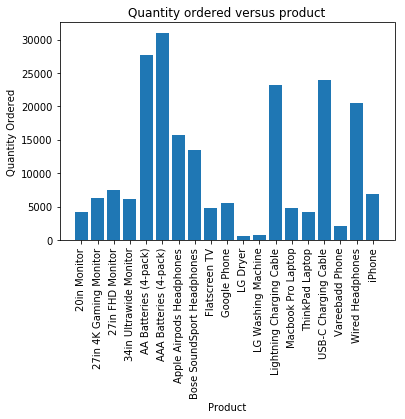

In [39]:
products=[product for product,df in prod]

plt.bar(products, quantity)
plt.xticks(products,rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Quantity ordered versus product')
plt.show()

### Products sold in relation to individual price

In [40]:
data['Price Each']= data['Price Each'].astype(float)


prices=data.groupby('Product').mean()['Price Each']

prices



Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

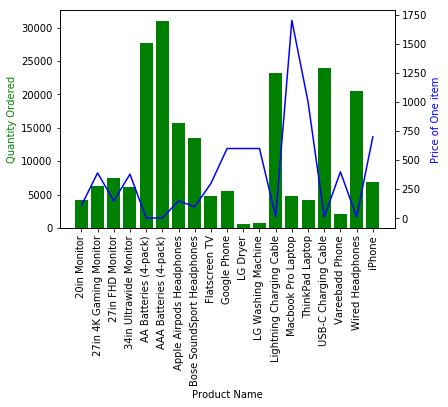

In [41]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price of One item', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()


### Cumulative money made from a single product

In [42]:
prices=data.groupby('Product').sum()['amt']

prices

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: amt, dtype: float64

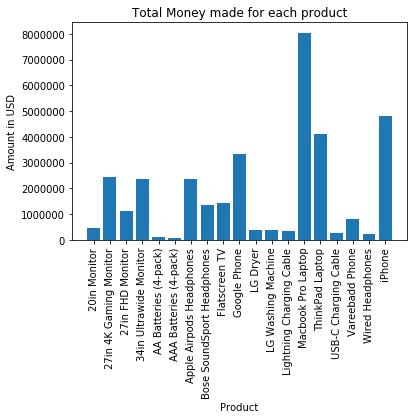

In [43]:
plt.bar(products, prices)
plt.xticks(products,rotation='vertical')
plt.ylabel('Amount in USD')
plt.xlabel('Product')
plt.title('Total Money made for each product')
plt.show()